In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os

In [2]:
#Import Visualization Libraries
import seaborn as sns
import scipy
import matplotlib.pyplot as plt

In [3]:
# import DF

df = pd.read_pickle(r'C:\Users\18179\Documents\CareerFoundry\InstaCart Basket Analysis\02 Data\Prepared Data\df_cust_prod_merged.pkl')

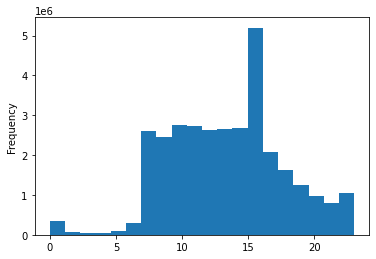

In [4]:
#3a. Histogram for Orders hour of day

hist = df['order_hour_of_day'].plot.hist(bins = 20)

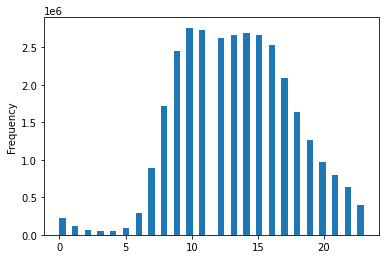

In [5]:
hist = df['order_hour_of_day'].plot.hist(bins = 48)

The above histogram shows the total number of orders, in millions, per each hour of the day. Order quantity picks up at 6 am, peaks from 8 am to 5 pm, then decreases as it gets later at night. I chose 48 bins in order to give seperation between bars so the graph will be more user friendly. 

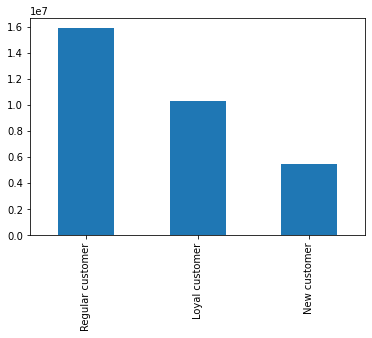

In [22]:
#4a. Bar chart showing customer loyalty.

bar = df['loyalty_flag'].value_counts().plot.bar()

In [7]:
#5a. Expenditure depending on hour of day. Create list of true / false values 

dev = np.random.rand(len(df)) <= 0.7

In [8]:
#Store 70% sample in big

big = df[dev]

In [9]:
#30% small

small = df[~dev]

In [10]:
#test length
len(df)

32404859

In [12]:
len(big) + len(small)

32404859

In [13]:
#reduce to neccessary samples

df_2 = small[['order_hour_of_day', 'prices']]

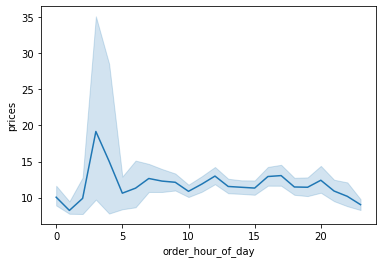

In [14]:
#Create line chart

line = sns.lineplot(data = df_2, x = 'order_hour_of_day', y = 'prices')

In [15]:
#6a. Explore customer demographics. Import customer df

df_cust = pd.read_csv(r"C:\Users\18179\Documents\CareerFoundry\InstaCart Basket Analysis\02 Data\Original Data\customers.csv", index_col = False)

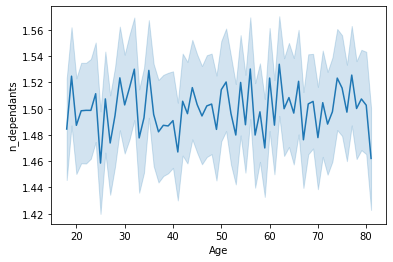

In [18]:
line_age_depend = sns.lineplot(data = df_cust, x = 'Age', y = 'n_dependants')

The line chart shows the age of customer on the x-axis with the average number of dependants per that age on the y-axis. It varies between 1.46 and 1.52 for the entire age range. More in-dpeth research needs to be done on this topic to garner specific insight. 

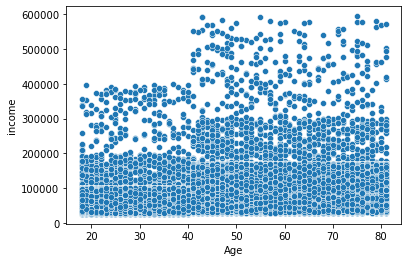

In [20]:
#7a. scatter plot of customer spending power
scat_age_spend = sns.scatterplot(data = df_cust, x = 'Age', y = 'income')

The scatterplot shows the age of instacart members on the x-axis with teir corresponding income on the y-axis. Most incomes fall under the 200k level, while there are quite a lot of wealthy customers making over 100k a year. 

In [21]:
#8a. export graphs

hist.figure.savefig(os.path.join(r"C:\Users\18179\Documents\CareerFoundry\InstaCart Basket Analysis\04 Analysis\Visualizations", 'hist_order_hour_prices.png'))


In [23]:
bar.figure.savefig(os.path.join(r"C:\Users\18179\Documents\CareerFoundry\InstaCart Basket Analysis\04 Analysis\Visualizations", 'bar_loyalty.png'))

In [24]:
line.figure.savefig(os.path.join(r"C:\Users\18179\Documents\CareerFoundry\InstaCart Basket Analysis\04 Analysis\Visualizations", 'line_order_hour_prices.png'))

In [25]:
line_age_depend.figure.savefig(os.path.join(r"C:\Users\18179\Documents\CareerFoundry\InstaCart Basket Analysis\04 Analysis\Visualizations", 'line_age_depend.png'))

In [26]:
scat_age_spend.figure.savefig(os.path.join(r"C:\Users\18179\Documents\CareerFoundry\InstaCart Basket Analysis\04 Analysis\Visualizations", 'scat_age_spend.png'))

In [28]:
#Crosstab check Nan values

crosstab = pd.crosstab(df['days_since_prior_order'], df['order_number'], dropna = False)

In [29]:
crosstab

order_number,1,2,3,4,5,6,7,8,9,10,...,90,91,92,93,94,95,96,97,98,99
days_since_prior_order,,,,,,,,,,,,,,,,,,,,,
0.0,0,20536,20441,17984,16438,16046,14384,13890,12774,11460,...,1195,1148,1040,937,1134,1099,1041,883,1037,935
1.0,0,31674,29950,28010,27092,25533,24996,22921,21783,21067,...,2787,2801,2728,2605,2606,2639,2436,2535,2633,2363
2.0,0,46454,46264,43902,40729,40907,38101,37519,35745,33830,...,3623,3555,3314,3589,3319,3072,2985,3057,3091,2609
3.0,0,61637,63388,59996,57882,56183,52869,49291,48295,47826,...,3318,3237,2799,3073,2902,2635,2658,2462,2168,2467
4.0,0,76733,78861,73540,70519,66569,62399,61143,59499,57700,...,2342,2260,2490,2031,1800,2083,1918,1792,1695,1810
5.0,0,88999,91741,86503,81859,77583,73584,70020,64468,63154,...,1630,1630,1367,983,1215,1220,1166,966,912,936
6.0,0,120681,122871,114644,106764,100756,95954,89752,87203,78634,...,754,842,940,1014,835,570,490,602,485,542
7.0,0,184802,181656,167597,157442,143628,137675,128423,120734,114769,...,634,573,521,440,602,421,420,378,419,322
8.0,0,112324,110742,102217,94945,87611,81622,78760,71070,67567,...,238,262,228,244,275,232,234,143,137,84


In [30]:
#view in Excel

crosstab.to_clipboard()